In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import re

data = pd.read_csv('merged_movies2.csv')
data['release_date'] = pd.to_datetime(data['release_date'])

# convert the genre column to a list instead of string
for idx, row in data.iterrows():
    words_in_quotes = re.findall(r"'(.*?)'", row['genres'])
    data.at[idx, 'genres'] = words_in_quotes
    
# Filter data from year 1990 - 2010 and remove rows with NaN box office
dataLast20 = data[data['release_date'].dt.year >= 1990]

In [2]:
# Sort data on Boxoffice
HighestGrossMovies = dataLast20[dataLast20['box_office'].notna()]
HighestGrossMovies = HighestGrossMovies.sort_values(by=['box_office'], ascending=False)
HighestGrossMovies = HighestGrossMovies[['title', 'box_office', 'genres']]
HighestGrossMovies.head(10)

,title,box_office,genres
6655,avatar,2.923000e+09,"[Action, Adventure, Fantasy, Science Fiction]"
3376,titanic,2.264000e+09,"[Drama, Romance]"
4654,the_lord_of_the_rings:_the_return_of_the_king,1.156000e+09,"[Adventure, Fantasy, Action]"
6816,toy_story_3,1.067000e+09,"[Animation, Family, Comedy]"
5360,pirates_of_the_caribbean:_dead_man's_chest,1.066000e+09,"[Adventure, Fantasy, Action]"
2622,jurassic_park,1.058000e+09,"[Adventure, Science Fiction]"
3665,star_wars:_episode_i_-_the_phantom_menace,1.027000e+09,"[Adventure, Action, Science Fiction]"
6064,the_dark_knight,1.006000e+09,"[Drama, Action, Crime, Thriller]"
6995,harry_potter_and_the_deathly_hallows:_part_1,9.771000e+08,"[Adventure, Fantasy]"
2794,the_lion_king,9.684000e+08,"[Family, Animation, Drama]"


In [3]:
# Created a new dataset called genre data and added a column that gives the number of movies for each genre
genreData = {'genres': [], 'count': []}
genreData = pd.DataFrame(genreData)
for i in HighestGrossMovies['genres']:
    for j in i:
        if j in genreData['genres'].values:
            idx = genreData[genreData['genres'] == j].index.values[0]
            genreData.at[idx, 'count'] = genreData['count'][idx] + 1
        else:
            genreData.loc[len(genreData.index)] = [j, 0]

C:\Users\HP\AppData\Local\Temp\ipykernel_23312\189216910.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if j in genreData['genres'].values:


In [4]:
# Created a new column to get the average box office for each genre
genreData["average_box_office"] = 0
genreData
for idx, i in HighestGrossMovies.iterrows():
    # print(i['box_office'])
    for j in i['genres']:
        index = genreData[genreData['genres'] == j].index.values[0]
        genreData.at[index, 'average_box_office'] = genreData['average_box_office'][index] + i['box_office']
        
genreData['average_box_office'] = genreData['average_box_office'] / genreData['count']
genreData

,genres,count,average_box_office
0,Action,657,1.499209e+08
1,Adventure,473,1.929912e+08
2,Fantasy,284,1.542166e+08
3,Science Fiction,287,1.621939e+08
4,Drama,1338,6.834362e+07
5,Romance,626,8.229483e+07
6,Animation,154,2.089510e+08
7,Family,386,1.349815e+08
8,Comedy,1234,8.268201e+07
9,Crime,556,6.985982e+07


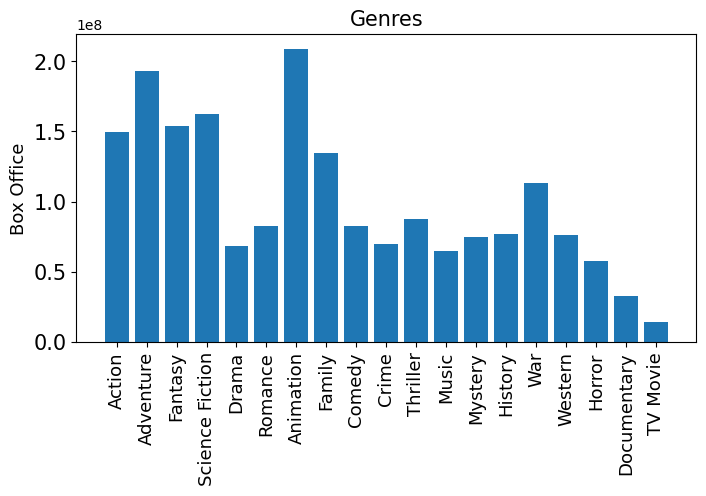

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 4))

_ = plt.bar(
    x = range(1, 20),
    height = list(genreData['average_box_office']),
    tick_label = genreData['genres'].tolist()
)

plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title('Genres', fontsize = 15)

## Set the x,y-labels
_ = plt.xticks(rotation = 'vertical', fontsize = 13)
_ = plt.ylabel("Box Office", fontsize = 13)

plt.show()

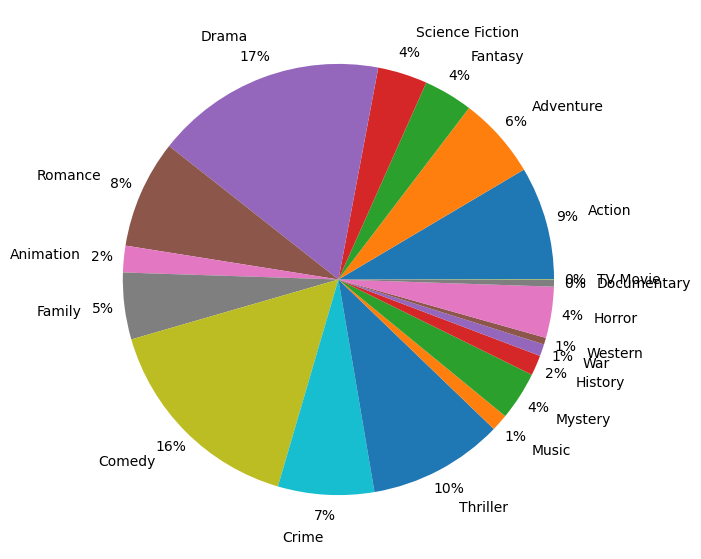

In [6]:
# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(genreData['count'], labels=genreData['genres'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
 
# show plot
plt.show()

In [7]:
movie_df = data[['title', 'genres', 'plot']]
# movie_df[movie_df['genres'].map(lambda d: len(d)) > 0]
for idx, i in movie_df.iterrows():
    # print(len(i['genres']) == 0 or pd.isna(movie_df.at[idx, 'plot']))
    if len(i['genres']) == 0 or pd.isna(movie_df.at[idx, 'plot']):
        movie_df = movie_df.drop([idx])
    else:
        movie_df.at[idx, 'genres'] = i['genres'][0]
    
movie_df.columns = ['Title', 'Genre', 'Plot']
movie_df

,Title,Genre,Plot
1,gun_crazy,Crime,"Teenager Barton ""Bart"" Tare gets caught breaki..."
3,stage_fright,Thriller,Eve Gill is an aspiring actress at the Royal A...
4,wagon_master,Adventure,The film opens with a prelude showing a murder...
5,the_asphalt_jungle,Crime,"When criminal mastermind Erwin ""Doc"" Riedensch..."
6,in_a_lonely_place,Drama,"Dixon ""Dix"" Steele is a down-on-his-luck Holly..."
...,...,...,...
7029,true_grit,Drama,"While on a trip to Fort Smith, Arkansas, fourt..."
7030,country_strong,Drama,"Beau Hutton sings with Kelly Canter, a recover..."
7034,blue_valentine,Drama,The movie begins with 5-year-old Frankie wakin...
7035,exorcismus,Thriller,"Secluded, home-schooled teenager Emma's uncont..."


In [8]:
from collections import Counter

In [9]:
Counter(movie_df["Title"]).most_common()

[('alice_in_wonderland', 3),
 ('a_christmas_carol', 3),
 ('father_of_the_bride', 2),
 ('broken_arrow', 2),
 ('the_day_the_earth_stood_still', 2),
 ('scrooge', 2),
 ('othello', 2),
 ('peter_pan', 2),
 ('titanic', 2),
 ('house_of_wax', 2),
 ('invaders_from_mars', 2),
 ('sabrina', 2),
 ('a_star_is_born', 2),
 ("we're_no_angels", 2),
 ('the_ladykillers', 2),
 ('invasion_of_the_body_snatchers', 2),
 ('the_king_and_i', 2),
 ('anastasia', 2),
 ('12_angry_men', 2),
 ('3:10_to_yuma', 2),
 ('dracula', 2),
 ('the_fly', 2),
 ('the_blob', 2),
 ('house_on_haunted_hill', 2),
 ('warlock', 2),
 ('the_mummy', 2),
 ('journey_to_the_center_of_the_earth', 2),
 ('the_time_machine', 2),
 ('village_of_the_damned', 2),
 ('psycho', 2),
 ("ocean's_eleven", 2),
 ('the_alamo', 2),
 ('the_parent_trap', 2),
 ('the_ladies_man', 2),
 ('cape_fear', 2),
 ('lolita', 2),
 ('the_nutty_professor', 2),
 ('lord_of_the_flies', 2),
 ('the_haunting', 2),
 ('the_pink_panther', 2),
 ('the_collector', 2),
 ('the_chase', 2),
 ('alfi

In [10]:
Counter(movie_df["Plot"].apply(lambda x: x[:50])).most_common()

[('Alice, a young girl, sits bored by a riverbank and', 3),
 ('The book is divided into five chapters, which Dick', 3),
 ('The story is told by Barbie to her little sister, ', 3),
 ('After a flying saucer lands in Washington, D.C., t', 2),
 ('Sabrina Fairchild is the young daughter of the Lar', 2),
 ('A psychiatrist, Dr. Hill, is called to the emergen', 2),
 ('Phileas Fogg is a wealthy English gentleman living', 2),
 ('Jonathan Harker, a newly qualified English solicit', 2),
 ('In a small Pennsylvania town, teenager Steve Andre', 2),
 ('Frederick Loren, an eccentric millionaire, invites', 2),
 ('The story begins in May 1863, at the home of Profe', 2),
 ('A Victorian English scientist and gentleman invent', 2),
 ('Professional thief Danny Ocean is released from a ', 2),
 ('Herbert H. Heebert is a young man who loses his gi', 2),
 ('The novel is prefaced by a fictitious foreword by ', 2),
 ('The novel is about a lonely young man, Frederick C', 2),
 ('The Grinch is a sour, solitary creatu

In [11]:
print("Rows before: {}".format(movie_df.shape[0]))
movie_df = movie_df.drop_duplicates(subset=['Plot'])
print("Rows after: {}".format(movie_df.shape[0]))

Rows before: 5864
Rows after: 5814


In [12]:
movie_df = movie_df[["Title", "Plot", "Genre"]]
movie_df.columns = ["title", "text", "label_name"]
movie_df

,title,text,label_name
1,gun_crazy,"Teenager Barton ""Bart"" Tare gets caught breaki...",Crime
3,stage_fright,Eve Gill is an aspiring actress at the Royal A...,Thriller
4,wagon_master,The film opens with a prelude showing a murder...,Adventure
5,the_asphalt_jungle,"When criminal mastermind Erwin ""Doc"" Riedensch...",Crime
6,in_a_lonely_place,"Dixon ""Dix"" Steele is a down-on-his-luck Holly...",Drama
...,...,...,...
7029,true_grit,"While on a trip to Fort Smith, Arkansas, fourt...",Drama
7030,country_strong,"Beau Hutton sings with Kelly Canter, a recover...",Drama
7034,blue_valentine,The movie begins with 5-year-old Frankie wakin...,Drama
7035,exorcismus,"Secluded, home-schooled teenager Emma's uncont...",Thriller


In [13]:
Counter(movie_df["label_name"]).most_common()

[('Comedy', 1365),
 ('Drama', 1193),
 ('Action', 712),
 ('Horror', 533),
 ('Adventure', 370),
 ('Crime', 325),
 ('Thriller', 232),
 ('Animation', 222),
 ('Family', 166),
 ('Science Fiction', 146),
 ('Fantasy', 135),
 ('Romance', 119),
 ('Western', 85),
 ('Mystery', 83),
 ('Music', 53),
 ('War', 31),
 ('History', 20),
 ('TV Movie', 16),
 ('Documentary', 8)]

In [14]:
labels = list(set(movie_df["label_name"]))
labels

['Fantasy',
 'Romance',
 'Family',
 'Crime',
 'Western',
 'TV Movie',
 'Science Fiction',
 'Adventure',
 'Music',
 'Drama',
 'War',
 'History',
 'Thriller',
 'Horror',
 'Documentary',
 'Mystery',
 'Animation',
 'Action',
 'Comedy']

In [15]:
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
label2id

{'Fantasy': 0,
 'Romance': 1,
 'Family': 2,
 'Crime': 3,
 'Western': 4,
 'TV Movie': 5,
 'Science Fiction': 6,
 'Adventure': 7,
 'Music': 8,
 'Drama': 9,
 'War': 10,
 'History': 11,
 'Thriller': 12,
 'Horror': 13,
 'Documentary': 14,
 'Mystery': 15,
 'Animation': 16,
 'Action': 17,
 'Comedy': 18}

In [16]:
movie_df["label"] = movie_df["label_name"].apply(lambda x: label2id[x])
movie_df.reset_index(drop=True, inplace=True)
movie_df

,title,text,label_name,label
0,gun_crazy,"Teenager Barton ""Bart"" Tare gets caught breaki...",Crime,3
1,stage_fright,Eve Gill is an aspiring actress at the Royal A...,Thriller,12
2,wagon_master,The film opens with a prelude showing a murder...,Adventure,7
3,the_asphalt_jungle,"When criminal mastermind Erwin ""Doc"" Riedensch...",Crime,3
4,in_a_lonely_place,"Dixon ""Dix"" Steele is a down-on-his-luck Holly...",Drama,9
...,...,...,...,...
5809,true_grit,"While on a trip to Fort Smith, Arkansas, fourt...",Drama,9
5810,country_strong,"Beau Hutton sings with Kelly Canter, a recover...",Drama,9
5811,blue_valentine,The movie begins with 5-year-old Frankie wakin...,Drama,9
5812,exorcismus,"Secluded, home-schooled teenager Emma's uncont...",Thriller,12


In [17]:
movie_df.isna().sum()

title         0
text          0
label_name    0
label         0
dtype: int64

In [18]:
import re
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [21]:
corpus = []
for i in range(0, movie_df.shape[0]):
    text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=movie_df['text'][i])
    text = text.lower()
    words = text.split()
    cleaned_words = [word for word in words if word not in set(stopwords.words('english'))]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in cleaned_words]
    text = ' '.join(words)
    corpus.append(text)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000, ngram_range = (1, 2))
x = cv.fit_transform(corpus).toarray()
y = movie_df['label'].values

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [25]:
y_pred = classifier.predict(x_test)
y_pred

array([17, 18,  9, ..., 18, 13, 18], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

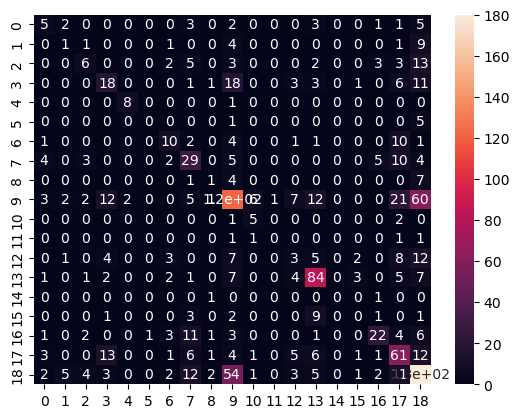

In [27]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4763542562338779